# Data Security: GAN based Steganography with Adversarial Perturbations

## Tasks:

1. Calculate F1 macro and accuracy for each algorithm wrt to the Steganalyzer.
  - Study the effect of each attack on the each algorithm and infer if any particular attack is more suitable or less suitable.

2. Calculate the overall detection (cluster 1,2,3,4 together) capacity of the steganalyzer in general and wrt to each attack.

## Understanding the Prediction Values:

- "Truth": ground truth about the type of image where 0 is "cover", 1 is 'JMiPOD', 2 is 'JUNIWARD', 3 is 'UERD', and 4 is 'Steganogan'.

- "No Attack": predicted likelihood of image being a stego given there is no attack introduced.

- "{} Attack": predicted likelihood of image being a stego after a {} attack is introduced.

## Import Libraries and Data

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
col_names = ["id","Truth", "No Attack", "FGSM Attack", "BIM Attack", "CW Attack",
             "RFGSM Attack", "PGD Attack", "FFGSM Attack", "MIFGSM Attack",
             "TPGD Attack"]
submissions = pd.read_csv("submission.csv", names=col_names, header=0)
submissions.drop(columns=["CW Attack", "TPGD Attack", "BIM Attack"], inplace=True)

In [5]:
submissions.head()

,id,Truth,No Attack,FGSM Attack,RFGSM Attack,PGD Attack,FFGSM Attack,MIFGSM Attack
0,18666.jpg,3,0.891935,0.921653,0.759984,0.873296,0.553913,0.474206
1,60731.jpg,1,0.619944,0.204064,0.885138,0.961690,0.803573,0.913771
2,41183.jpg,3,0.749048,0.760121,0.551045,0.185842,0.665388,0.053544
3,18649.jpg,3,0.786586,0.574780,0.598732,0.662323,0.513326,0.257391
4,28590.jpg,0,0.715295,0.799239,1.000000,0.996683,0.965851,0.968420


In [6]:
def attack_evaluator(ground_truth, prediction):
  '''
  understand the detection error rate. ~ number of times the steganalyzer 
  fails to notice the stego.
  '''
  ground_truth = ground_truth.apply(lambda x: 0 if x==0 else 1)
  prediction = prediction.apply(lambda x: 0 if x <= 0.5 else 1)

  accuracy = accuracy_score(list(ground_truth), list(prediction))
  error_rate = 1 - accuracy
  return round(error_rate, 3)

## Task 1:

How often is the considered algorithm able to smartly fool the steganalyzer?

In [7]:
table_columns = ["Steganographic Algo"] + list(submissions.columns[2:])

targets_list = []
for label_id, target in enumerate(['cover', 'JMiPOD', 'JUNIWARD', 'UERD', 'SteganoGAN']):
  
  if label_id == 0:
    continue
  
  target_group = submissions[submissions["Truth"] == label_id].reset_index(drop=True)
  target_eval_list = [target] 
  for i, column in enumerate(submissions.columns[2:]):
    target_eval_list.append(attack_evaluator(target_group["Truth"], target_group[column]))
  
  targets_list.append(target_eval_list)

eval_per_target = pd.DataFrame(targets_list, columns=table_columns)

In [8]:
eval_per_target

,Steganographic Algo,No Attack,FGSM Attack,RFGSM Attack,PGD Attack,FFGSM Attack,MIFGSM Attack
0,JMiPOD,0.038,0.423,0.251,0.394,0.107,0.580
1,JUNIWARD,0.056,0.416,0.263,0.401,0.120,0.587
2,UERD,0.055,0.407,0.277,0.408,0.133,0.577
3,SteganoGAN,0.072,0.228,0.260,0.448,0.116,0.710


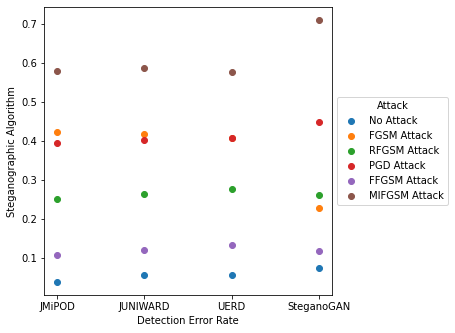

In [12]:
columns = eval_per_target.columns[1:]
x = eval_per_target["Steganographic Algo"].values
fig = plt.figure(figsize=(8,5))
ax  = fig.add_subplot(111)
ax.set_position([0.1,0.1,0.5,0.8])
for col in columns:
  y = eval_per_target[col].values
  ax.scatter(x, y, label=col)
plt.legend(title="Attack", loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Steganographic Algorithm")
plt.xlabel("Detection Error Rate")
plt.savefig('eval_algos_horizontal.png')

## Task 2: Generalization Study

In [10]:
target_no_gan = submissions[submissions["Truth"] != 4].reset_index(drop=True)
eval_list_no_gan = ["No GAN"]
eval_list_overall = ["Overall"]

for i, column in enumerate(submissions.columns[2:]):
  eval_list_no_gan.append(attack_evaluator(target_no_gan["Truth"], target_no_gan[column]))
  eval_list_overall.append(attack_evaluator(submissions["Truth"], submissions[column]))
eval_generalization = pd.DataFrame([eval_list_no_gan, eval_list_overall], columns=table_columns)

In [11]:
eval_generalization

,Steganographic Algo,No Attack,FGSM Attack,RFGSM Attack,PGD Attack,FFGSM Attack,MIFGSM Attack
0,No GAN,0.265,0.500,0.438,0.546,0.332,0.683
1,Overall,0.226,0.445,0.402,0.526,0.289,0.689
